# Clustering for Heart Disease

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
#from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("new_datapfe.csv")
pd.set_option('display.max_columns', None)
df 

,Patient_ID,SEX,MARITAL,EDUCA,WEIGHT2,HEIGHT3,_INCOMG,_BMI5,_AGEG5YR,GENHLTH,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,ALCDAY5,AVEDRNK2,MAXDRNKS,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,DRNKANY5,MENTHLTH,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,_MICHD,CHCSCNCR,DIABETE3,SMOKE100,SMOKDAY2,USENOW3,_SMOKER3,_RFSMOK3,PHYSHLTH
0,1,2,1,4,280.0,510.0,2,4018.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,18,310.0,320.0,310.0,305.0,101.0,33.0,67.0,33.0,17.0,100.0,50.0,217.0,2,1,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,3.0,1.0,3.0,3.0,2,1,15.0
1,2,2,2,6,165.0,508.0,1,2509.0,7,3.0,1.0,64.000000,212.0,100.0,69.0,212.0,100.0,0.0,1.0,2.0,0,1,0,1,2,0,305.0,302.0,202.0,202.0,304.0,17.0,7.0,29.0,29.0,13.0,24.0,78.0,2,2,3.0,1.0,1,4.0,2.0,2,2.0,2,2.0,2.0,3.0,1.0,1.0,3.0,1,2,0.0
2,3,2,2,4,158.0,511.0,5,2204.0,11,4.0,1.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,900,1,99900,1,1,0,101.0,555.0,101.0,555.0,101.0,100.0,0.0,100.0,0.0,100.0,100.0,200.0,1,1,3.0,1.0,1,1.0,1.0,7,2.0,1,2.0,2.0,3.0,2.0,3.0,3.0,2,1,15.0
3,4,2,1,4,180.0,507.0,5,2819.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,30,101.0,555.0,301.0,301.0,201.0,100.0,0.0,3.0,3.0,14.0,100.0,20.0,1,2,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,30.0
4,5,2,1,5,142.0,504.0,5,2437.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,102.0,203.0,204.0,310.0,320.0,200.0,43.0,57.0,33.0,67.0,100.0,200.0,1,1,3.0,1.0,1,1.0,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,441452,2,3,2,104.0,503.0,2,1842.0,11,4.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,555.0,205.0,555.0,201.0,201.0,0.0,71.0,0.0,14.0,14.0,29.0,200.0,2,2,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,1.0,2.0,3.0,3.0,2,1,0.0
441452,441453,2,1,5,160.0,503.0,1,2834.0,2,1.0,1.0,64.000000,105.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,101.0,202.0,303.0,201.0,202.0,100.0,29.0,10.0,14.0,29.0,117.0,82.0,1,2,3.0,1.0,1,1.0,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,0.0
441453,441454,2,1,4,247.0,505.0,3,4110.0,11,4.0,1.0,52.432544,103.0,30.0,0.0,102.0,30.0,202.0,2.0,2.0,7,1,93,1,1,20,101.0,555.0,101.0,555.0,101.0,100.0,0.0,100.0,0.0,100.0,100.0,200.0,1,1,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,3.0,1.0,3.0,3.0,2,1,0.0
441454,441455,1,5,5,166.0,511.0,1,2315.0,7,3.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,101.0,101.0,202.0,301.0,301.0,100.0,100.0,29.0,3.0,3.0,200.0,135.0,1,1,1.0,1.0,1,1.0,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,0.0


* CVDINFR4: you had a heart attack, also called a myocardial infarction? 
* CVDCRHD4: you had angina or coronary heart disease? 
* CVDSTRK3: you had a stroke ?
* _MICHD:  have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

In [3]:
import pandas as pd

# Assuming your dataset is stored in a pandas DataFrame called 'data'
# 'target' is a list of multiple features
target = ['CVDINFR4','CVDCRHD4','CVDSTRK3','_MICHD']
# Calculate correlation between target and individual features
correlation = df.corrwith(df[target])

# Sort features based on correlation values
sorted_features = correlation.abs().sort_values(ascending=False)

# Select the top-k features based on correlation
k = 20  # Number of features to select
selected_features = sorted_features[:k].index.tolist()
selected_features

['CVDCRHD4',
 '_MICHD',
 'CVDSTRK3',
 'CVDINFR4',
 'ALCDAY5',
 'AVEDRNK2',
 'BEANDAY_',
 'BLOODCHO',
 'BPHIGH4',
 'BPMEDS',
 'CHCSCNCR',
 'CHOLCHK',
 'DIABETE3',
 'DRNKANY5',
 'DROCDY3_',
 'EDUCA',
 'EXERANY2',
 'EXERHMM1',
 'EXERHMM2',
 'EXEROFT1']

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from itertools import combinations

# Assuming your dataset is stored in a pandas DataFrame called 'data'
# 'target' is a list of multiple features

# Initialize a machine learning algorithm (e.g., Linear Regression)
model = LinearRegression()

# Perform cross-validation and evaluate the performance for different feature subsets
best_score = 0.0
best_features = []
target = ['CVDINFR4','CVDCRHD4','CVDSTRK3','_MICHD']
# Loop through different feature combinations


In [4]:
for k in range(1, len(df.columns)):
    # Generate all possible feature combinations of size k
    feature_combinations = combinations(df.columns, k)

    # Iterate through each combination
    for features in feature_combinations:
        # Convert features to a list
        feature_list = list(features)

        # Train and evaluate the model using cross-validation
        scores = cross_val_score(model, df[feature_list], df[target], cv=5)

        # Calculate the average score
        avg_score = scores.mean()

        # Check if the current combination performs better
        if avg_score > best_score:
            best_score = avg_score
            best_features = feature_list

# The best_features list will contain the selected features with the highest performance

KeyboardInterrupt: 

In [ ]:
print(best_features)

In [3]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Separate target variable from features
X = df.drop('CVDCRHD4', axis=1)
y = df['CVDCRHD4']


In [4]:
# Select top k features using mutual information score
k = 20
selector = SelectKBest(mutual_info_classif, k=k)
selector.fit(X, y)

KeyboardInterrupt: 

In [ ]:
# Get selected feature indices and names
selected_features = X.columns[selector.get_support()]
print('Selected features:', selected_features)

In [5]:
!pip install yellowbrick

KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb1b3efb20>,
                 estimator=KMeans(n_clusters=10, random_state=42), k=(1, 11))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


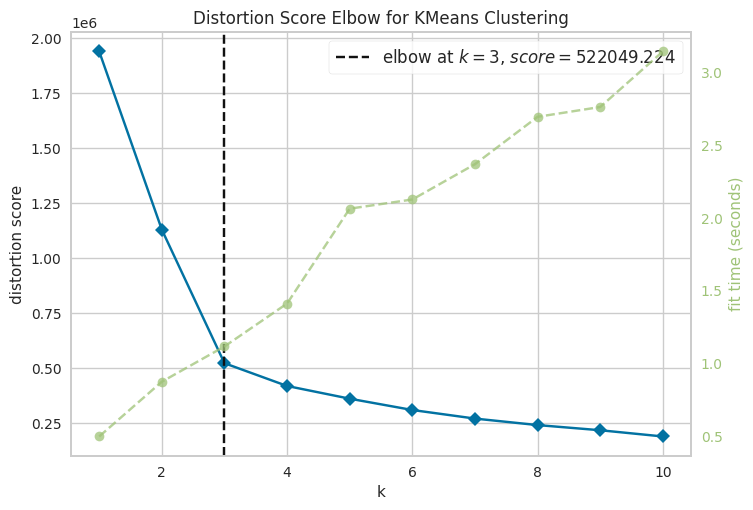

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

features = ['CVDCRHD4',
 '_MICHD',
 'CVDSTRK3',
 'CVDINFR4',
 'ALCDAY5',
 'AVEDRNK2',
 'BEANDAY_',
 'BLOODCHO',
 'BPHIGH4',
 'BPMEDS',
 'CHCSCNCR',
 'CHOLCHK',
 'DIABETE3',
 'DRNKANY5',
 'DROCDY3_',
 'EDUCA',
 'EXERANY2',
 'EXERHMM1',
 'EXERHMM2',
 'EXEROFT1']
#features = ['SEX', 'EXERANY2', '_RFBING5', '_RFDRHV5', '_VEGLT1', 'BPHIGH4',
 #      'BPMEDS', 'BLOODCHO', 'CHOLCHK', 'TOLDHI2', 'CVDCRHD4', 'CVDSTRK3',
  #     '_MICHD', 'CHCSCNCR', 'DIABETE3', 'SMOKE100', 'SMOKDAY2', 'USENOW3','CVDINFR4',
   #    '_SMOKER3', '_RFSMOK3']
daf = df[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std()

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_std), columns=['PC1', 'PC2'])

# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

visualizer = KElbowVisualizer(kmeans, k=(1, 11))

# Fit the data to the visualizer
visualizer.fit(df_pca)

# Visualize the elbow curve
visualizer.show()

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'Behavioral Segmentation Clustering')

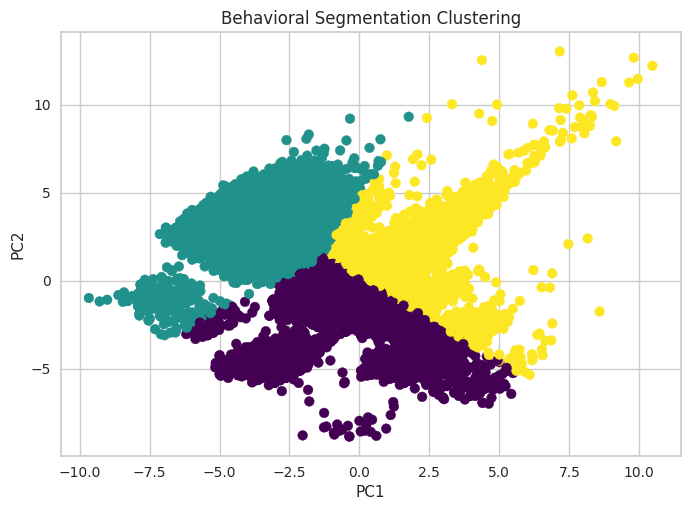

In [5]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmodel = kmeans.fit_predict(df_pca)

# Visualize the clusters
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=kmodel, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Behavioral Segmentation Clustering')
plt.show()

In [ ]:
# Create a new dataframe with the original features and the cluster labels
clustered_data = pd.concat([daf.reset_index(drop=True), pd.DataFrame({'cluster': kmeans.labels_})], axis=1)

# Calculate the size of each cluster
cluster_sizes = clustered_data['cluster'].value_counts().sort_index()

# Print the size of each cluster
print('Cluster Sizes:')
for i in range(len(cluster_sizes)):
    print(f'Cluster {i}: {cluster_sizes[i]}')

# Calculate the mean values of each feature for each cluster
cluster_means = clustered_data.groupby('cluster').mean()

# Print the mean values of each feature for each cluster
print('\nCluster Means:')
print(cluster_means)

#for i in range(kmeans.n_clusters):
 #   cluster = clustered_data.loc[clustered_data['cluster'] == i]
  #  profile = ProfileReport(cluster, title=f"Cluster {i} Profile Report", explorative=True)
   # profile.to_file(f"clustering9_{i}_profile.html")

Cluster Sizes:
Cluster 0: 348451
Cluster 1: 58795
Cluster 2: 34210

Cluster Means:
              SEX  EXERANY2  _RFBING5  _RFDRHV5   _VEGLT1   BPHIGH4    BPMEDS  \
cluster                                                                         
0        1.594787  1.215152  1.102382  1.042804  1.168661  2.258803  1.060746   
1        1.533107  1.340879  1.230802  1.108547  1.248763  2.268594  1.098852   
2        1.465361  1.363403  1.039784  1.022450  1.215785  1.419731  1.054195   

         BLOODCHO   CHOLCHK   TOLDHI2  CVDCRHD4  CVDSTRK3    _MICHD  CHCSCNCR  \
cluster                                                                         
0        1.234991  1.315436  1.663795  1.999128  1.984546  1.995041  1.908595   
1        1.366426  1.392806  1.682201  1.983825  1.974675  1.942325  1.945472   
2        1.056124  1.090617  1.294534  1.297428  1.834405  1.020345  1.803566   

         DIABETE3  SMOKE100  SMOKDAY2   USENOW3  CVDINFR4  _SMOKER3  _RFSMOK3  
cluster                  

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
target = ['CVDINFR4','CVDCRHD4','CVDSTRK3','_MICHD']
cluster_labels = kmeans.labels_
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(daf.drop(daf[target], axis=1), cluster_labels, test_size=0.2, random_state=42)

# Train a classifier on the training set
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate accuracy of predictions
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Accuracy: 0.8607235083586282


In [6]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#kmeans_silhouette = silhouette_score(daf, kmodel)
kmeans_calinski = calinski_harabasz_score(daf, kmodel)
kmeans_davies = davies_bouldin_score(daf, kmodel)

#print("KMeans - Silhouette Coefficient: ", kmeans_silhouette)
print("KMeans - Calinski-Harabasz Index: ", kmeans_calinski)
print("KMeans - Davies-Bouldin Index: ", kmeans_davies)

KMeans - Calinski-Harabasz Index:  42656.92537914977
KMeans - Davies-Bouldin Index:  2.034382444725976


### Disease risk prediction:

In [6]:
# Split data into features (X) and target variable (y)
X = daf.drop(['CVDINFR4','CVDCRHD4','CVDSTRK3','_MICHD'], axis=1)
y = daf[['CVDINFR4','CVDCRHD4','CVDSTRK3','_MICHD']]


# Add the cluster labels as a new column to the DataFrame
cluster_labels = kmeans.labels_
daf['cluster'] = cluster_labels


In [7]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train_list, y_test_list = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of y_train_list:", y_train_list.shape)
print("Shape of y_test_list:", y_test_list.shape)

Shape of y_train_list: (353164, 4)
Shape of y_test_list: (88292, 4)


In [31]:
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression


# Split data into training and testing sets
X_train, X_test, y_train_list, y_test_list = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train separate logistic regression models for each target feature
models = []
for i in range(y_train_list.shape[1]):
    model = LogisticRegression()
    model.fit(X_train, y_train_list.iloc[:, i])
    models.append(model)

# Predict disease risk for new data for each target feature
y_pred_list = [model.predict(X_test) for model in models]

# Evaluate the performance of the models for each target feature
accuracies = [model.score(X_test, y_test_list.iloc[:, i]) for i, model in enumerate(models)]
precisions = [precision_score(y_test_list.iloc[:, i], y_pred_list[i], average='macro', zero_division=0) for i in range(len(y_test_list.columns))]
recalls = [recall_score(y_test_list.iloc[:, i], y_pred_list[i], average='macro', zero_division=0) for i in range(len(y_test_list.columns))]

# Print the evaluation metrics for each target feature
for i in range(len(y_train_list.columns)):
    print(f"Metrics for Target Feature {i+1}:")
    print("Accuracy:", accuracies[i])
    print("Precision:", precisions[i])
    print("Recall:", recalls[i])
    print()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

Metrics for Target Feature 1:
Accuracy: 0.9589883568160196
Precision: 0.5453706454239559
Recall: 0.5754233425046195

Metrics for Target Feature 2:
Accuracy: 0.9697141303855389
Precision: 0.8301128874075652
Recall: 0.9531197316056126

Metrics for Target Feature 3:
Accuracy: 0.955511258098129
Precision: 0.3185037526993763
Recall: 0.3333333333333333

Metrics for Target Feature 4:
Accuracy: 0.9972704208761836
Precision: 0.9978989844943382
Recall: 0.9848498160633059



In [9]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score



# Split data into training and testing sets
X_train, X_test, y_train_list, y_test_list = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train separate logistic regression models for each target feature
models = []
for i in range(y_train_list.shape[1]):
    model = SVC()
    model.fit(X_train, y_train_list.iloc[:, i])
    models.append(model)

# Predict disease risk for new data for each target feature
y_pred_list = [model.predict(X_test) for model in models]

# Evaluate the performance of the models for each target feature
accuracies = [model.score(X_test, y_test_list.iloc[:, i]) for i, model in enumerate(models)]
precisions = [precision_score(y_test_list.iloc[:, i], y_pred_list[i], average='macro', zero_division=0) for i in range(len(y_test_list.columns))]
recalls = [recall_score(y_test_list.iloc[:, i], y_pred_list[i], average='macro', zero_division=0) for i in range(len(y_test_list.columns))]

# Print the evaluation metrics for each target feature
for i in range(len(y_train_list.columns)):
    print(f"Metrics for Target Feature {i+1}:")
    print("Accuracy:", accuracies[i])
    print("Precision:", precisions[i])
    print("Recall:", recalls[i])
    print()

KeyboardInterrupt: 

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree classifier on the training data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict the disease risk for the test data
predictions = model.predict(X_test)

# Evaluate the performance of the model (e.g., accuracy, precision, recall)
accuracy = model.score(X_test, y_test)
precision = precision_score(y_test, predictions,average = 'macro')
recall = recall_score(y_test, predictions,average = 'macro')
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Accuracy: 0.9714696688261677
Precision: 0.6305119666256597
Recall: 0.6018104787547395


In [15]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a gradient boosting classifier on the training data
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Predict the target variable for the test data
predictions = model.predict(X_test)

# Evaluate the performance of the model (e.g., accuracy, precision, recall)
accuracy = model.score(X_test, y_test)
precision = precision_score(y_test, predictions,average = 'macro')
recall = recall_score(y_test, predictions,average = 'macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Accuracy: 0.9732591854301635
Precision: 0.7636931738648252
Recall: 0.5946614736574408


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest classifier on the training data
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict the target variable for the test data
predictions = model.predict(X_test)

# Evaluate the performance of the model (e.g., accuracy, precision, recall)
accuracy = model.score(X_test, y_test)
precision = precision_score(y_test, predictions,average = 'macro')
recall = recall_score(y_test, predictions,average = 'macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.9717754722964708
Precision: 0.6413416623396445
Recall: 0.5941155930637555


we use logistic regression as the predictive model to calculate the risk scores. We select a subset of features and the target variable (CVDINFR4 in this case) for risk prediction. The data is preprocessed, split into training and testing sets, and a logistic regression model is trained on the training data. The model is then used to predict the risk scores for all data points, and the average predicted risk score is calculated for each cluster. Finally, the predicted risk scores for each cluster are printed.

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Preprocess the data (scaling, handling missing values, etc.)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Train separate logistic regression models for each target feature
logreg_models = {}
predicted_risk_scores = {}

for feature in y.columns:
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train[feature])
    logreg_models[feature] = logreg
    predicted_risk_scores[feature] = logreg.predict_proba(X_scaled)[:, 1]

# Assign the predicted risk scores to each target feature using the same cluster labels
for feature in y.columns:
    daf[f'PredictedRisk_{feature}'] = predicted_risk_scores[feature]

# Calculate the average predicted risk score for each cluster and each target feature
average_risk_scores = {}

for feature in y.columns:
    average_risk_scores[feature] = {}
    for cluster in set(cluster_labels):
        cluster_indices = cluster_labels == cluster
        average_risk_scores[feature][cluster] = predicted_risk_scores[feature][cluster_indices].mean()

# Print the predicted risk scores for each cluster and each target feature
for feature in y.columns:
    for cluster, prediction in average_risk_scores[feature].items():
        print(f"Cluster {cluster}: Predicted risk of {feature} - {prediction:.4f}")

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

Cluster 0: Predicted risk of CVDINFR4 - 0.9954
Cluster 1: Predicted risk of CVDINFR4 - 0.9908
Cluster 2: Predicted risk of CVDINFR4 - 0.3396
Cluster 0: Predicted risk of CVDCRHD4 - 0.9996
Cluster 1: Predicted risk of CVDCRHD4 - 0.9985
Cluster 2: Predicted risk of CVDCRHD4 - 0.3349
Cluster 0: Predicted risk of CVDSTRK3 - 0.9819
Cluster 1: Predicted risk of CVDSTRK3 - 0.9566
Cluster 2: Predicted risk of CVDSTRK3 - 0.8207
Cluster 0: Predicted risk of _MICHD - 0.9968
Cluster 1: Predicted risk of _MICHD - 0.9975
Cluster 2: Predicted risk of _MICHD - 0.0000


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Preprocess the data (scaling, handling missing values, etc.)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Train separate logistic regression models for each target feature
randm_models = {}
predicted_risk_scores = {}

for feature in y.columns:
    randm = RandomForestClassifier()
    randm.fit(X_train, y_train[feature])
    randm_models[feature] = randm
    predicted_risk_scores[feature] = randm.predict_proba(X_scaled)[:, 1]

# Assign the predicted risk scores to each target feature using the same cluster labels
for feature in y.columns:
    daf[f'PredictedRisk_{feature}'] = predicted_risk_scores[feature]

# Calculate the average predicted risk score for each cluster and each target feature
average_risk_scores = {}

for feature in y.columns:
    average_risk_scores[feature] = {}
    for cluster in set(cluster_labels):
        cluster_indices = cluster_labels == cluster
        average_risk_scores[feature][cluster] = predicted_risk_scores[feature][cluster_indices].mean()

# Print the predicted risk scores for each cluster and each target feature
for feature in y.columns:
    for cluster, prediction in average_risk_scores[feature].items():
        print(f"Cluster {cluster}: Predicted risk of {feature} - {prediction:.4f}")

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

Cluster 0: Predicted risk of CVDINFR4 - 0.9950
Cluster 1: Predicted risk of CVDINFR4 - 0.9907
Cluster 2: Predicted risk of CVDINFR4 - 0.3431
Cluster 0: Predicted risk of CVDCRHD4 - 0.9996
Cluster 1: Predicted risk of CVDCRHD4 - 0.9985
Cluster 2: Predicted risk of CVDCRHD4 - 0.3375
Cluster 0: Predicted risk of CVDSTRK3 - 0.9808
Cluster 1: Predicted risk of CVDSTRK3 - 0.9556
Cluster 2: Predicted risk of CVDSTRK3 - 0.8171
Cluster 0: Predicted risk of _MICHD - 0.9967
Cluster 1: Predicted risk of _MICHD - 0.9974
Cluster 2: Predicted risk of _MICHD - 0.0000


In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Preprocess the data (scaling, handling missing values, etc.)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Train separate logistic regression models for each target feature
gradient_models = {}
predicted_risk_scores = {}

for feature in y.columns:
    gradient = GradientBoostingClassifier()
    gradient.fit(X_train, y_train[feature])
    gradient_models[feature] = gradient
    predicted_risk_scores[feature] = gradient.predict_proba(X_scaled)[:, 1]

# Assign the predicted risk scores to each target feature using the same cluster labels
for feature in y.columns:
    daf[f'PredictedRisk_{feature}'] = predicted_risk_scores[feature]

# Calculate the average predicted risk score for each cluster and each target feature
average_risk_scores = {}

for feature in y.columns:
    average_risk_scores[feature] = {}
    for cluster in set(cluster_labels):
        cluster_indices = cluster_labels == cluster
        average_risk_scores[feature][cluster] = predicted_risk_scores[feature][cluster_indices].mean()

# Print the predicted risk scores for each cluster and each target feature
for feature in y.columns:
    for cluster, prediction in average_risk_scores[feature].items():
        print(f"Cluster {cluster}: Predicted risk of {feature} - {prediction:.4f}")

GradientBoostingClassifier()

GradientBoostingClassifier()

GradientBoostingClassifier()

GradientBoostingClassifier()

Cluster 0: Predicted risk of CVDINFR4 - 0.9955
Cluster 1: Predicted risk of CVDINFR4 - 0.9905
Cluster 2: Predicted risk of CVDINFR4 - 0.3415
Cluster 0: Predicted risk of CVDCRHD4 - 0.9993
Cluster 1: Predicted risk of CVDCRHD4 - 0.9984
Cluster 2: Predicted risk of CVDCRHD4 - 0.3369
Cluster 0: Predicted risk of CVDSTRK3 - 0.9825
Cluster 1: Predicted risk of CVDSTRK3 - 0.9559
Cluster 2: Predicted risk of CVDSTRK3 - 0.8218
Cluster 0: Predicted risk of _MICHD - 0.9969
Cluster 1: Predicted risk of _MICHD - 0.9973
Cluster 2: Predicted risk of _MICHD - 0.0008


In [ ]:
from sklearn.svm import SVC
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Preprocess the data (scaling, handling missing values, etc.)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Train separate logistic regression models for each target feature
sv_models = {}
predicted_risk_scores = {}

for feature in y.columns:
    sv = SVC()
    sv.fit(X_train, y_train[feature])
    sv_models[feature] = sv
    predicted_risk_scores[feature] = sv.predict_proba(X_scaled)[:, 1]

# Assign the predicted risk scores to each target feature using the same cluster labels
for feature in y.columns:
    daf[f'PredictedRisk_{feature}'] = predicted_risk_scores[feature]

# Calculate the average predicted risk score for each cluster and each target feature
average_risk_scores = {}

for feature in y.columns:
    average_risk_scores[feature] = {}
    for cluster in set(cluster_labels):
        cluster_indices = cluster_labels == cluster
        average_risk_scores[feature][cluster] = predicted_risk_scores[feature][cluster_indices].mean()

# Print the predicted risk scores for each cluster and each target feature
for feature in y.columns:
    for cluster, prediction in average_risk_scores[feature].items():
        print(f"Cluster {cluster}: Predicted risk of {feature} - {prediction:.4f}")

### Model Evaluation:

In [ ]:
# For Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve, auc
from sklearn.model_selection import learning_curve

##### 1. Confusion Matrix:

Confusion matrix is a measurement technique for machine learning classification. It shows:

- **TP (True Positive):** Predicted values correctly predicted as actual positive.
- **FP (False Positive):** Predicted values incorrectly predicted an actual positive. (i.e., Negative values predicted as positive)
- **FN (False Negative):** Positive values predicted as negative.
- **TN (True Negative):** Predicted values correctly predicted as an actual negative.

In [ ]:
def plot_confusion_matrix(y_test, y_predict, color, title):
    """
    Confusion matrix to evaluate the accuracy of Models
    """
    cm = confusion_matrix(y_test, y_predict)
    sns.heatmap(cm, annot=True, fmt='d', cmap=color)
    plt.title(title)
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)
    plt.tight_layout()
    plt.show()

In [ ]:
# Logistic Regression model
title = 'Confusion Matrix of Logistic Regression'
plot_confusion_matrix(y_test, y_pred_logreg, 'Blues', title);

In [ ]:
# Random Forest model
title = 'Confution Matrix of Random Forest'
plot_confusion_matrix(y_test, y_pred_rf, 'Blues', title);

In [ ]:
# SVM model
title = 'Confution Matrix of SVM Model'
plot_confusion_matrix(y_test, y_pred_svm, 'Blues', title);

In [ ]:
# XGBoost Classifier model
title = 'Confution Matrix of XGBoost Classifier'
plot_confusion_matrix(y_test, y_pred_xgb, 'Blues', title);

In [ ]:
# DecisionTreeClassifier Classifier model
title = 'Confution Matrix of Decision Tree Classifier'
plot_confusion_matrix(y_test, y_pred_xgb, 'Blues', title);

##### 2. ROC and AUC:

- **Receiver Operating Characteristic (ROC) Curve** shows the accuracy of a model classification.

- It plots true positive (TP) rate to false positive (FP) rate
represents the intuitive trade-off between sensitivity (=TP) and specificity (=FP).
The upper left corner of the ROC means the point where 100% of sensitivity and 100% of specificity, a perfect test. So, the closer the ROC curve is to the top left corner, the better the test model is.
- On the other hand, **AUC (Area Under Curve)** represents measurement of separability for the estimator.

- The classification threshold is 0.5.
- The higher the AUC is, the better the model is at predicting appropriately.

In [ ]:
def plot_roc_auc(model1, model2, X_test, y_test, title1, title2):
    """
    Show both ROC and AUC of the model and its parameter tuning model
    """
    plot_roc_curve(model1, X_test, y_test)
    plt.title(title1, fontsize=13)
    
    plot_roc_curve(model2, X_test, y_test)
    plt.title(title2, fontsize=13)
    plt.show()

In [ ]:
# ROC and AUC for Logistic Regression models
title1 = 'ROC and AUC of Logistic Regression'
title2 = 'ROC and AUC of Logistic Regression with GridSearchCV'
plot_roc_auc(logreg, logreg_gscv, X_test, y_test, title1, title2);

In [ ]:
# ROC and AUC for Random Forest models
title1 = 'ROC and AUC of Random Forest'
title2 = 'ROC and AUC of Random Forest with GridSearchCV'
plot_roc_auc(rf_model, rf_gscv, X_test, y_test, title1, title2);

In [ ]:
# ROC and AUC for SVM models
title1 = 'ROC and AUC of SVM'
title2 = 'ROC and AUC of SVM with GridSearchCV'
plot_roc_auc(svm_model, svm_gscv, X_test, y_test, title1, title2);

In [ ]:
# ROC and AUC for XGBClassifier    
title1 = 'ROC and AUC of XGBClassifier'
title2 = 'ROC and AUC of XGBClassifier with GridSearchCV'
plot_roc_auc(xgb_model, xgb_gscv, X_test, y_test, title1, title2);

In [ ]:
# ROC and AUC for SVM models
title1 = 'ROC and AUC of SVM'
title2 = 'ROC and AUC of SVM with GridSearchCV'
plot_roc_auc(svm_model, svm_gscv, X_test, y_test, title1, title2);

##### 3. Learning Curve:

Learning curve shows the training score and the validation of a model for varying numbers of training samples.

In [ ]:
def plot_learning_curve(model, title, X, y, ylim=None, cv=5, n_jobs=4, 
                        train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Draw the training and GridSearchCV testing learning curves
    """
    plt.figure(figsize=(10, 7))
    plt.title(title, fontsize=20)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Number of training samples', fontsize=15)
    plt.ylabel('Score', fontsize=15)
    plt.tick_params(labelsize=14)
    
    # Get training and test scores along with train_sizes
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, 
                                                            cv=cv, n_jobs=n_jobs,
                                                            train_sizes=train_sizes)
    
    # Calculate mean and standard deviation of training and test data
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid(color='gray',linestyle='-')
    
    # Plot the learning curves
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='r')
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color='g')
   
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
             label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
             label='Cross-validation score')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    return plt


In [ ]:
# Learning curve for Logistic Regression Models
title = 'Learning Curves (Logistic Regression)'
plot_learning_curve(logreg, title, X_train, y_train, ylim=None, 
                    cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10));

In [ ]:
# Learning curve for Random Forest models
title = 'Learning Curves (Random Forest Model)'
plot_learning_curve(rf_model, title, X_train, y_train, ylim=None, 
                    cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10));

In [ ]:
# Learning curve for SVM models
title = 'Learning Curves (SVM Model)'
plot_learning_curve(svm_model, title, X_train, y_train, ylim=None, 
                    cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10));

In [ ]:
# Learning Curve for XGBoost Classifier Model
title = 'Learning Curves (XGBoost Classifier Model)'
plot_learning_curve(xgb_model, title, X_train, y_train, ylim=None, 
                    cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10));

#### 7. Model Comparison:

In [ ]:
# Get test and model tuning test score for each model
# Make lits of test score for each model and a model name list
test_list = [logreg_acc, rf_acc, svm_acc, xgb_acc]
#tuning_test_list = [logreg_gscv_acc, rf_gscv_acc, svm_gscv_acc, xgb_gscv_acc]
model_names = ['LogisticRegression', 'RandomForest', 'SVM', 'XGBClassifier']

# Make dataframes of each test score
test_list = pd.DataFrame(test_list)
tuning_test_list = pd.DataFrame(tuning_test_list)
model_names = pd.DataFrame(model_names)

# Name each column
test_list.columns = ['Default']
tuning_test_list.columns = ['with GridSearchCV']
model_names.columns = ['model']

# Concatenate each column
over_all_score = pd.concat([model_names, test_list, tuning_test_list], axis=1)
print(over_all_score)

    
# Plot bar chart of each test score results
fig = go.Figure(data=[go.Bar(x=over_all_score['model'], y=over_all_score['Default'], 
                             name='Test Results', texttemplate='%{y:20,.4f}', 
                             textposition='outside', marker={'line': {'width': 5}}),
                      go.Bar(x=over_all_score['model'], y=over_all_score['with GridSearchCV'], 
                             name='Model Tuning Test Results', texttemplate='%{y:20,.4f}', 
                             textposition='outside', marker={'line': {'width': 5}})])
fig.update_layout(title_text='Test and Model Tuning Test Results for each Model',
                  title_x=0.5, title_font=dict(size=20))
fig.update_xaxes(title_text='Models', title_font={'size': 15})
fig.update_yaxes(title_text='Score', title_font={'size': 15})
fig.update_traces(marker={'line': {'color': 'Black', 'width': 1}})
fig.show()